<a href="https://colab.research.google.com/github/giuliaries/object-detection/blob/main/cnn_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Object Detection with YOLOv8

Program for Google Colab that trains a YOLOv8 model for object detection using Roboflow

In [ ]:
# ============================================================================
# LIBRARY INSTALLATION AND IMPORTS
# ============================================================================

# Install required libraries
print("Installing required libraries...")
!pip install roboflow ultralytics -q

# Import necessary libraries
import os
import shutil
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from IPython.display import display, Image as IPImage
import yaml

print("✓ Libraries imported successfully")

# Check GPU availability
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"\n{'=' * 70}")
print(f"Device: {device}")
if device == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024 ** 3:.2f} GB")
print(f"{'=' * 70}\n")

import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# ROBOFLOW CONFIGURATION AND DATASET DOWNLOAD
# ============================================================================

# Roboflow credentials (needed for training only)
ROBOFLOW_API_KEY = "Tci79vVpwGbCxMmTBrDt"  # Replace with your PRIVATE API key
ROBOFLOW_WORKSPACE = "university-h35bh"  # Replace with your workspace
ROBOFLOW_PROJECT = "cat-npklm-7ijlg"  # Replace with your project name
ROBOFLOW_VERSION = 1  # Dataset version

# ============================================================================
# TRAINING CONFIGURATION
# ============================================================================

# YOLOv8 model variants (choose one):
# - yolov8n.pt (nano)    - Fastest, smallest, lowest accuracy
# - yolov8s.pt (small)   - Good balance
# - yolov8m.pt (medium)  - Better accuracy
# - yolov8l.pt (large)   - High accuracy
# - yolov8x.pt (xlarge)  - Best accuracy, slowest

# Model configuration
MODEL_SIZE = "yolov8n.pt" # Change this to use a different model size
TRAINED_MODEL_PATH = 'best_yolov8_model.pt'  # Path to your trained model (for inference)

# Training hyperparameters
EPOCHS = 100  # Number of training epochs
IMAGE_SIZE = 640  # Image size (YOLOv8 standard is 640)
BATCH_SIZE = 16  # Batch size (adjust based on GPU memory)
PATIENCE = 20  # Early stopping patience
SAVE_PERIOD = 10  # Save checkpoint every N epochs

# Advanced hyperparameters (optional tuning)
LEARNING_RATE = 0.01  # Initial learning rate
MOMENTUM = 0.937  # SGD momentum
WEIGHT_DECAY = 0.0005  # Weight decay

# Inference settings
CONF_THRESHOLD = 0.25  # Confidence threshold for detections
IOU_THRESHOLD = 0.45  # IoU threshold for NMS

Installing required libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✓ Libraries imported successfully

Device: cuda
GPU: Tesla T4
GPU Memory: 14.56 GB



#TRAINING SECTION


STARTING TRAINING MODE

ROBOFLOW DATASET DOWNLOAD

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cat-1 in yolov8:: 100%|██████████| 631/631 [00:00<00:00, 7098.29it/s]


✓ Dataset downloaded to: /content/cat-1

DATASET VERIFICATION

Training images: 249
Validation images: 43
Test images: 18

Number of classes: 1
Classes: ['Cats']

MODEL INITIALIZATION

Loading YOLOv8 model: yolov8n.pt
✓ Model loaded successfully

TRAINING START

Training configuration:
  • Epochs: 100
  • Image size: 640
  • Batch size: 16
  • Patience: 20

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cat-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.

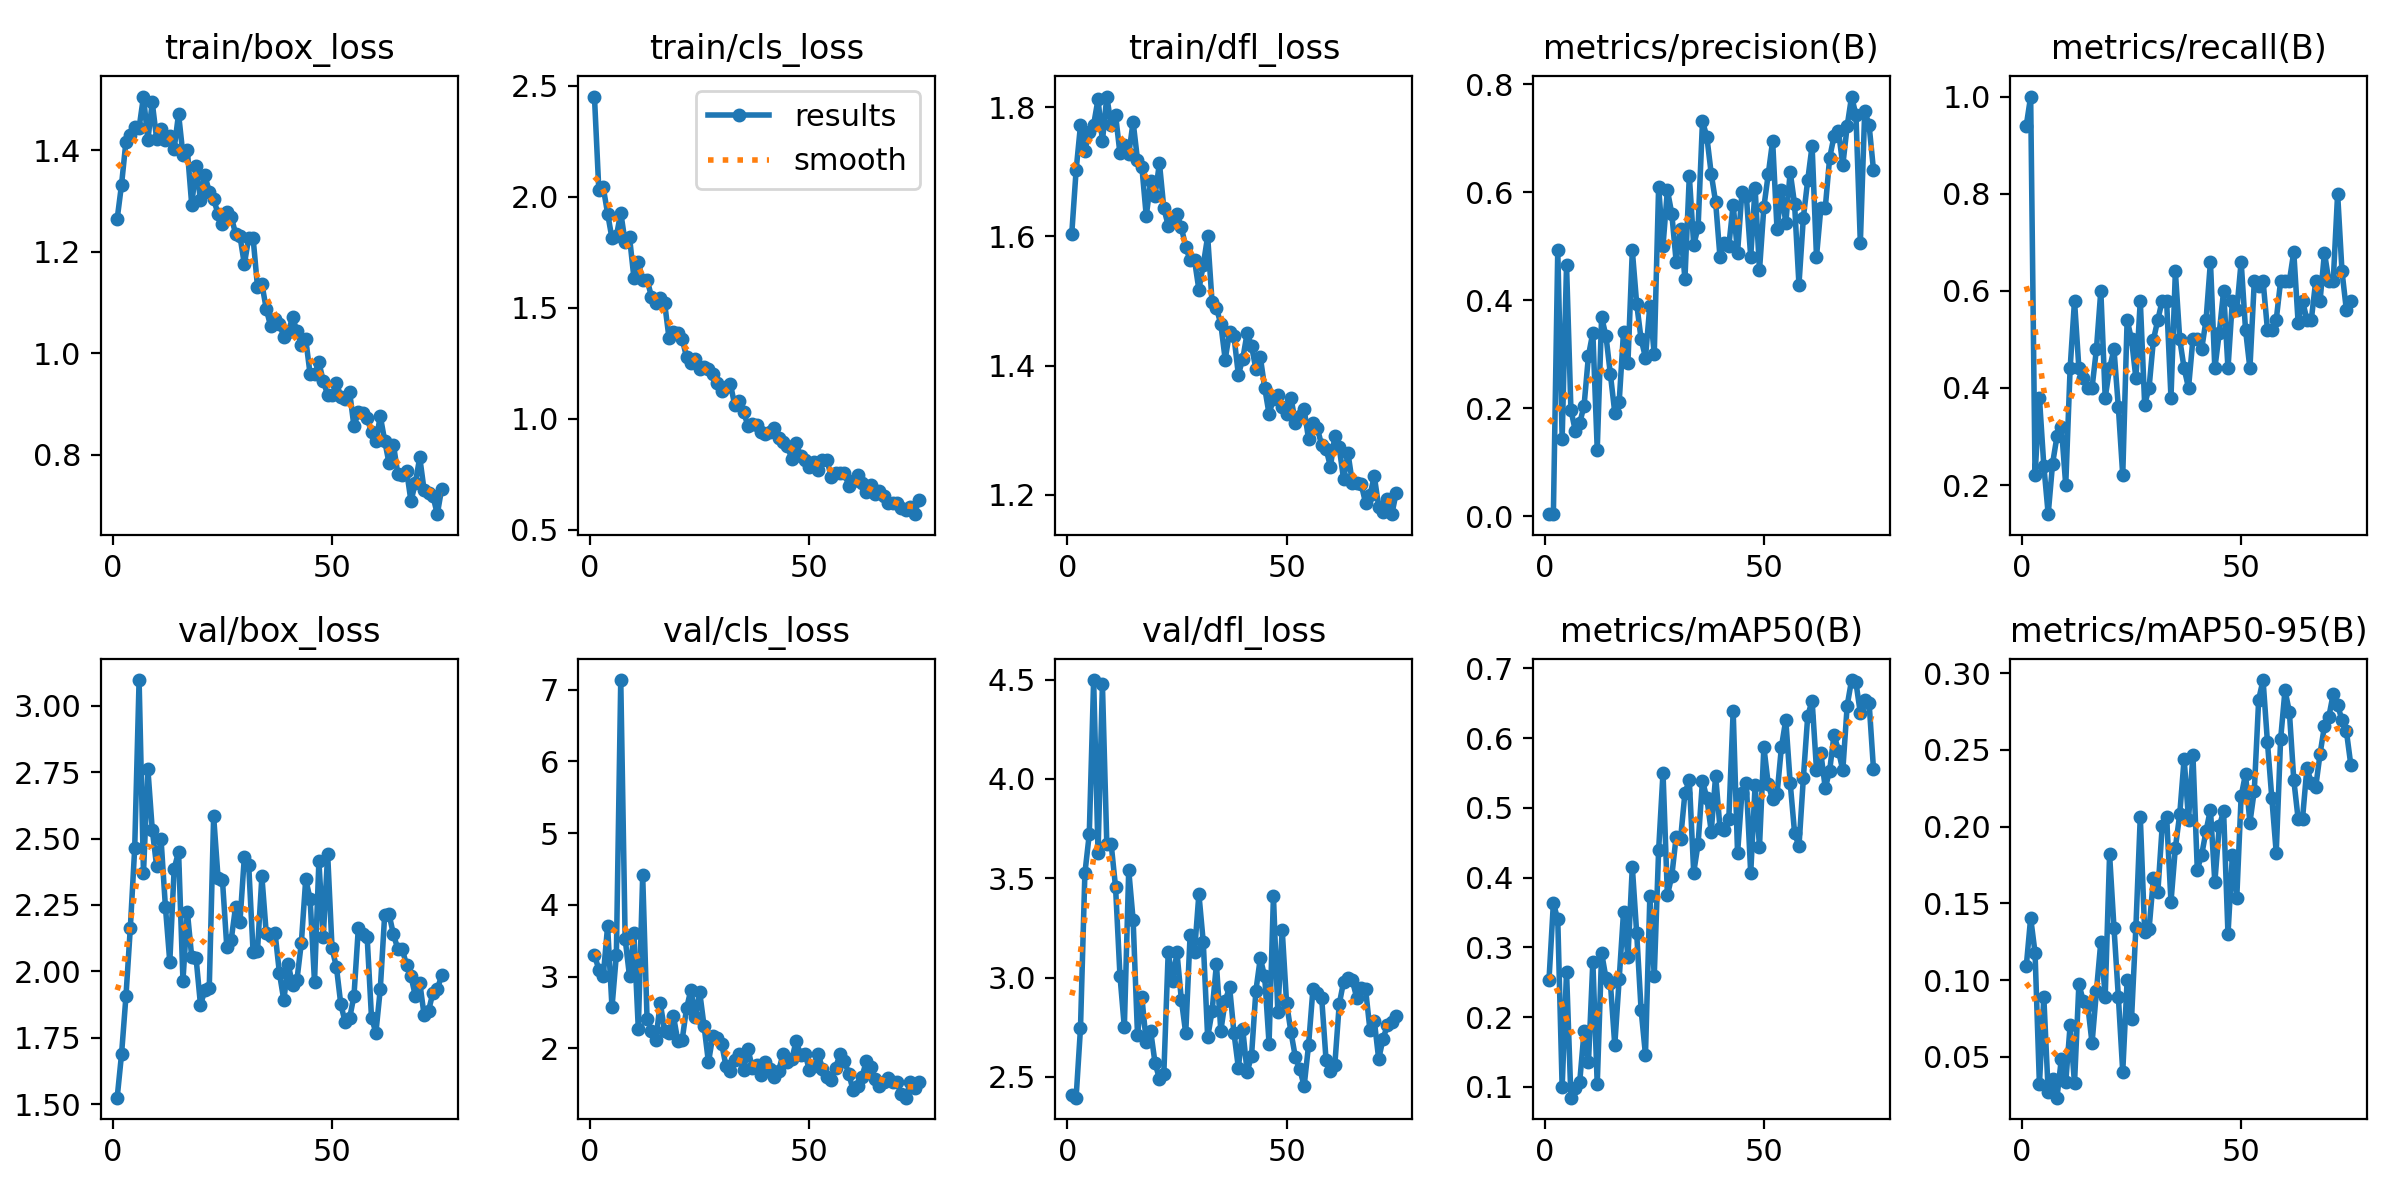


Confusion Matrix:


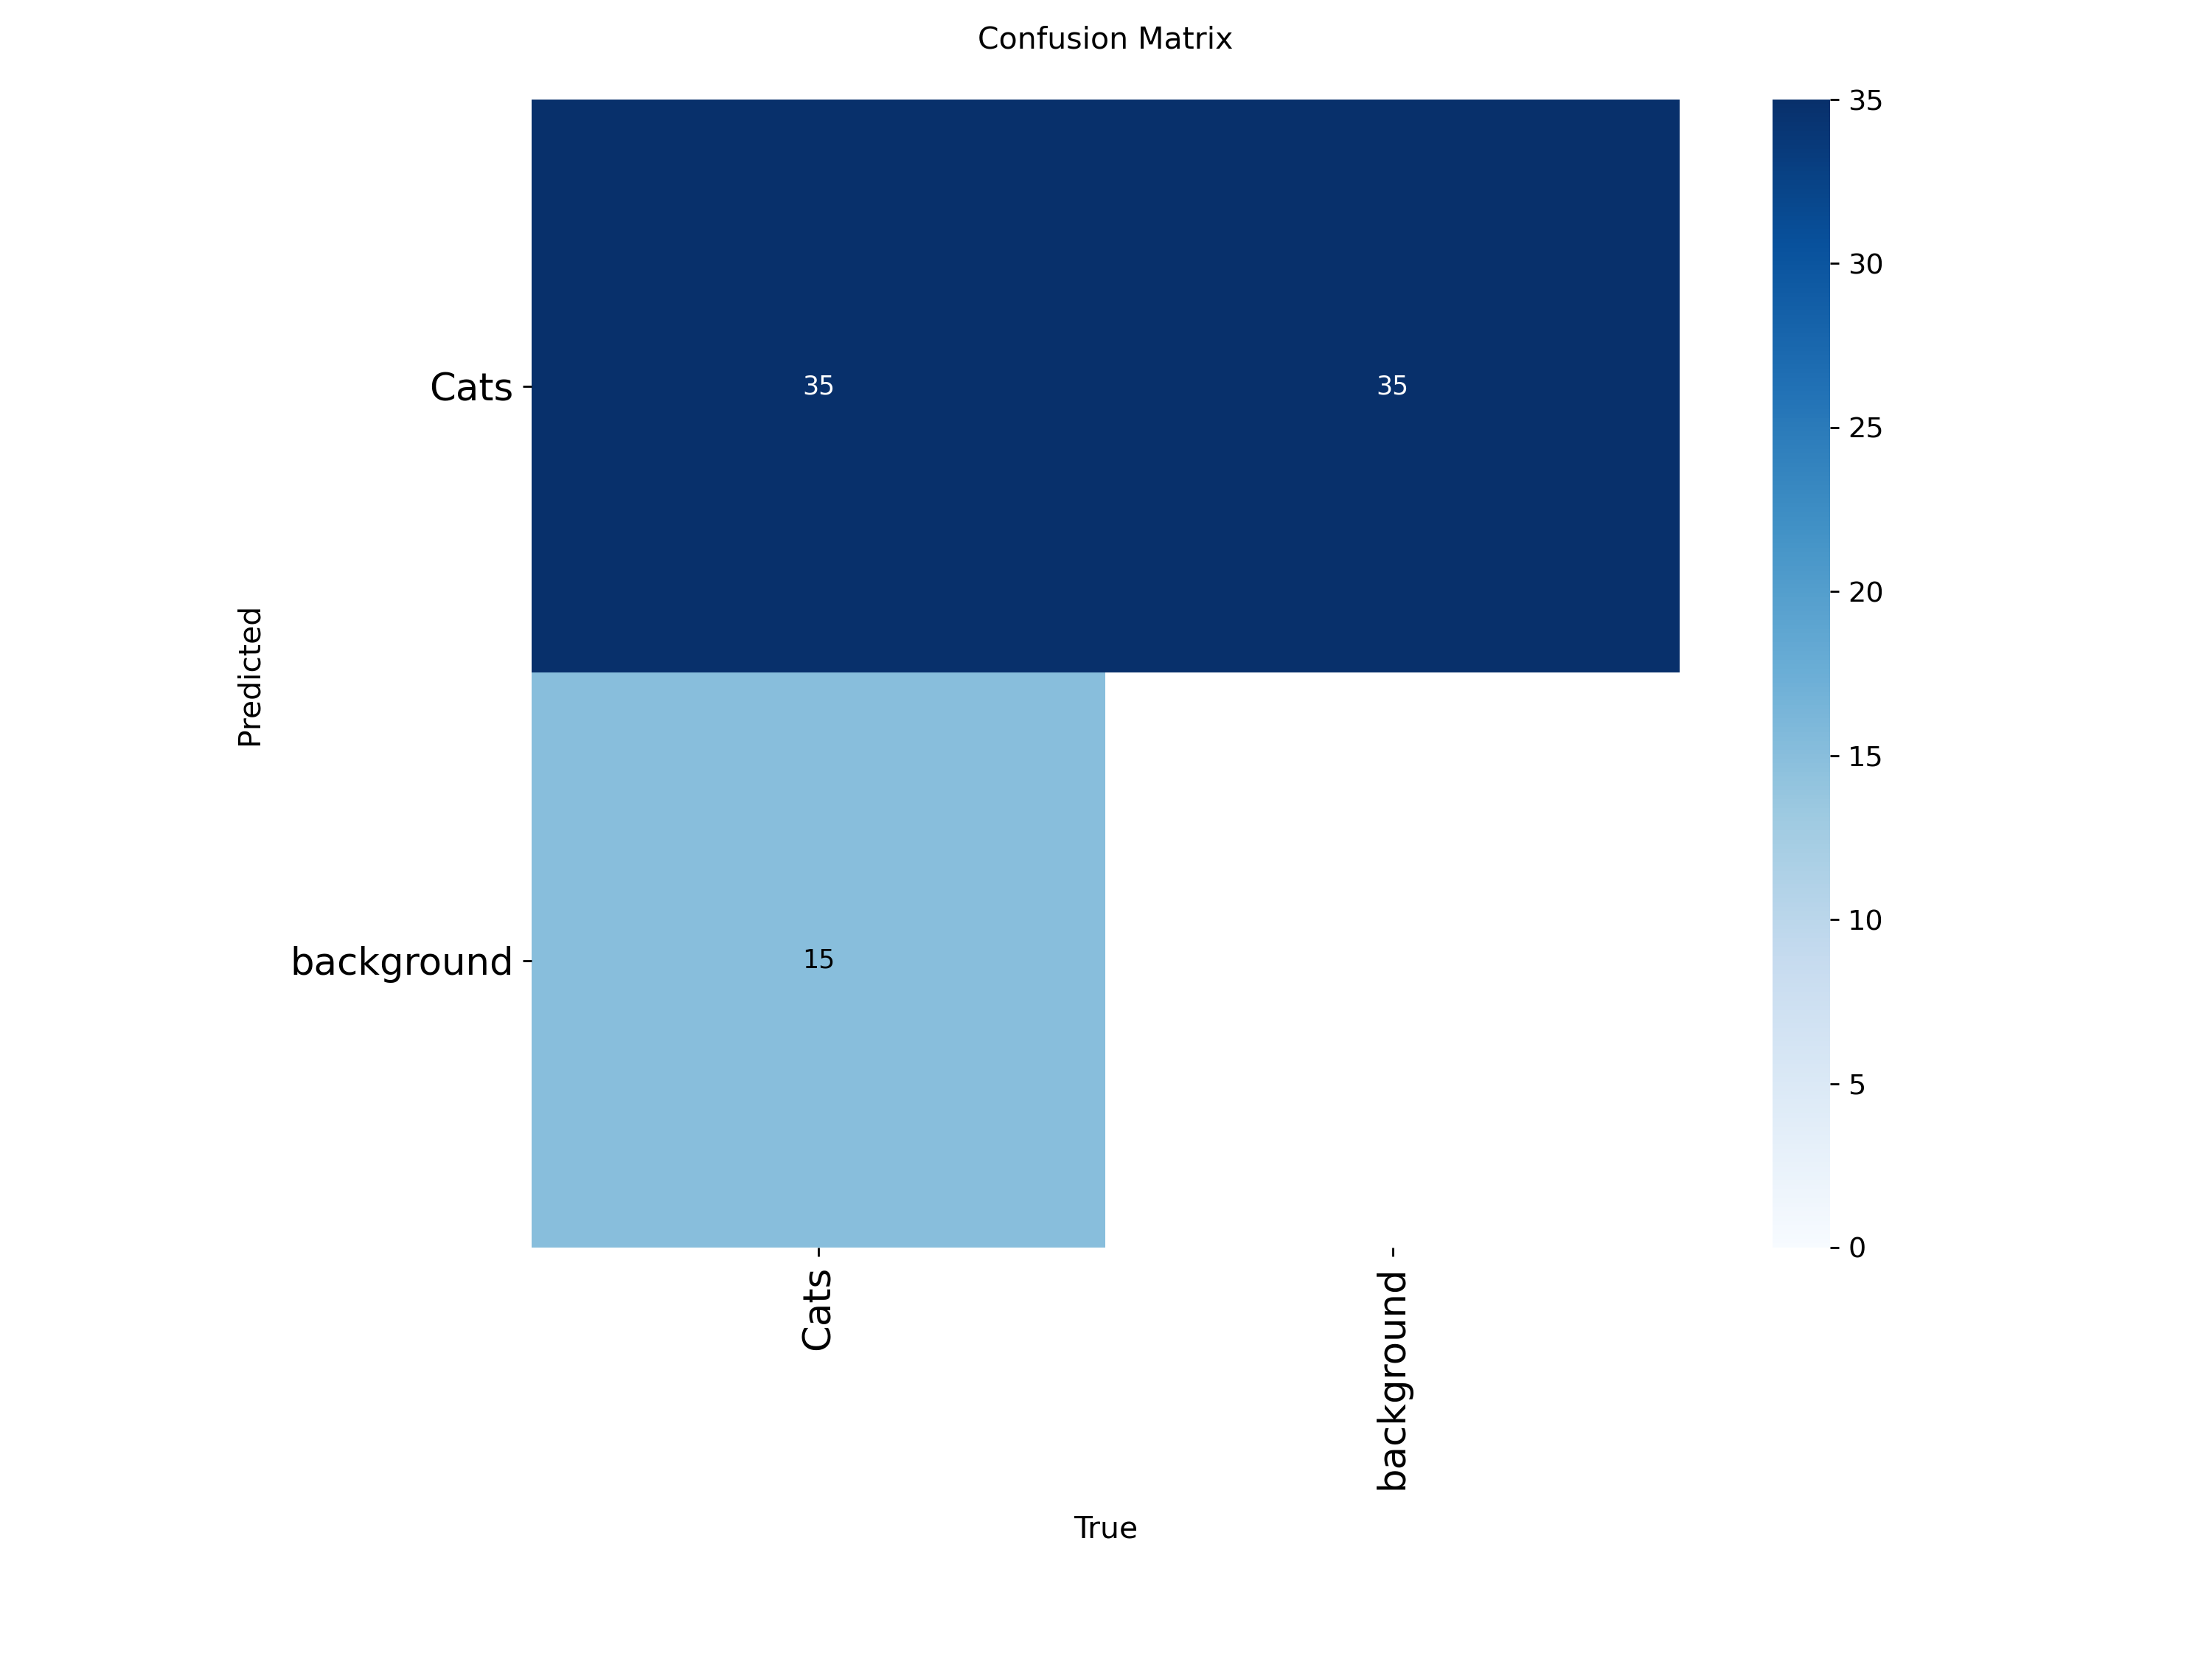


MODEL EVALUATION

✓ Loaded model from: runs/detect/yolov8_training/weights/best.pt
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 645.0±102.5 MB/s, size: 24.1 KB)
val: Scanning /content/cat-1/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 43/43 12.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.9it/s 1.6s
                   all         43         50      0.554       0.62      0.628      0.296
Speed: 7.3ms preprocess, 12.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val

VALIDATION METRICS
mAP50 (IoU=0.5): 0.6284
mAP50-95: 0.2965
Precision: 0.5545
Recall: 0.6200


TEST SET PREDICTIONS


image 1/18 /content/cat-1/test/images/0066-J3l4Zf33nfc_jpg.rf.2303ff73f00104c853ea4b3e

In [ ]:
print("\n" + "="*70)
print("STARTING TRAINING MODE")
print("="*70 + "\n")

# ========================================================================
# 1. DOWNLOAD DATASET FROM ROBOFLOW
# ========================================================================

print("="*70)
print("ROBOFLOW DATASET DOWNLOAD")
print("="*70 + "\n")

# Initialize Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)

# Download dataset in YOLOv8 format
print("Downloading dataset in YOLOv8 format...")
dataset = project.version(ROBOFLOW_VERSION).download("yolov8")

print(f"✓ Dataset downloaded to: {dataset.location}")

# ========================================================================
# 2. VERIFY DATASET
# ========================================================================

print("\n" + "="*70)
print("DATASET VERIFICATION")
print("="*70 + "\n")

train_images = os.path.join(dataset.location, 'train', 'images')
valid_images = os.path.join(dataset.location, 'valid', 'images')
test_images = os.path.join(dataset.location, 'test', 'images')

print(f"Training images: {len(os.listdir(train_images)) if os.path.exists(train_images) else 0}")
print(f"Validation images: {len(os.listdir(valid_images)) if os.path.exists(valid_images) else 0}")
print(f"Test images: {len(os.listdir(test_images)) if os.path.exists(test_images) else 0}")

# Load class information
data_yaml_path = os.path.join(dataset.location, 'data.yaml')
with open(data_yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

class_names = data_config['names']
num_classes = len(class_names)

print(f"\nNumber of classes: {num_classes}")
print(f"Classes: {class_names}")

# ========================================================================
# 3. LOAD MODEL
# ========================================================================

print("\n" + "="*70)
print("MODEL INITIALIZATION")
print("="*70 + "\n")

print(f"Loading YOLOv8 model: {MODEL_SIZE}")
model = YOLO(MODEL_SIZE)
print("✓ Model loaded successfully")

# ========================================================================
# 4. TRAIN MODEL
# ========================================================================

print("\n" + "="*70)
print("TRAINING START")
print("="*70 + "\n")

print(f"Training configuration:")
print(f"  • Epochs: {EPOCHS}")
print(f"  • Image size: {IMAGE_SIZE}")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Patience: {PATIENCE}")
print()

# Train the model
results = model.train(
    data=data_yaml_path,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    patience=PATIENCE,
    save=True,
    save_period=SAVE_PERIOD,
    device=device,
    workers=2,
    #project='runs/detect',
    name='yolov8_training',
    exist_ok=True,
    pretrained=True,
    optimizer='auto',
    verbose=True,
    plots=True,
    val=True,
)

print("\n" + "="*70)
print("TRAINING COMPLETED")
print("="*70 + "\n")

# ========================================================================
# DEBUG: Find where models are actually saved
# ========================================================================

print("\n" + "="*70)
print("SEARCHING FOR SAVED MODELS")
print("="*70 + "\n")

import glob

# Search for all .pt files in runs/detect/
pt_files = glob.glob('runs/detect/**/*.pt', recursive=True)

if pt_files:
    print(f"✓ Found {len(pt_files)} model file(s):")
    for pt_file in pt_files:
        file_size = os.path.getsize(pt_file) / (1024*1024)  # MB
        print(f"  • {pt_file} ({file_size:.1f} MB)")

    # Use the first best.pt found, or last.pt if no best
    best_files = [f for f in pt_files if 'best.pt' in f]
    last_files = [f for f in pt_files if 'last.pt' in f]

    if best_files:
        best_model_path = best_files[0]
        print(f"\n✓ Using best model: {best_model_path}")
    elif last_files:
        best_model_path = last_files[0]
        print(f"\n✓ Using last model: {best_model_path}")
    else:
        best_model_path = pt_files[0]
        print(f"\n✓ Using model: {best_model_path}")
else:
    print("❌ No .pt files found in runs/detect/")
    print("\nSearching in current directory...")
    pt_files = glob.glob('**/*.pt', recursive=True)
    if pt_files:
        print(f"Found {len(pt_files)} .pt files elsewhere:")
        for pt_file in pt_files[:10]:  # Show first 10
            print(f"  • {pt_file}")
    else:
        print("No .pt files found anywhere")
    best_model_path = None

print("="*70 + "\n")

# ========================================================================
# 5. DISPLAY TRAINING RESULTS
# ========================================================================

print("\n" + "="*70)
print("TRAINING RESULTS")
print("="*70 + "\n")

# Display results plot
results_plot_path = 'runs/detect/yolov8_training/results.png'
if os.path.exists(results_plot_path):
    print("Training Results:")
    display(IPImage(filename=results_plot_path))

# Display confusion matrix
confusion_matrix_path = 'runs/detect/yolov8_training/confusion_matrix.png'
if os.path.exists(confusion_matrix_path):
    print("\nConfusion Matrix:")
    display(IPImage(filename=confusion_matrix_path))

# ========================================================================
# 6. EVALUATE MODEL
# ========================================================================

print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70 + "\n")

# Load best model - with error handling
best_model_path = 'runs/detect/yolov8_training/weights/best.pt'

# Check if model exists
if not os.path.exists(best_model_path):
    print(f"⚠ Best model not found at: {best_model_path}")
    print("Looking for alternative paths...")

    # Try alternative paths
    alternative_paths = [
        '/content/runs/detect/runs/detect/yolov8_training/weights/best.pt',  # Actual path
        'runs/detect/runs/detect/yolov8_training/weights/best.pt',           # Relative version
        'runs/detect/yolov8_training/weights/last.pt',
        '/content/runs/detect/runs/detect/yolov8_training/weights/last.pt',
        'runs/detect/train/weights/best.pt',
        'runs/detect/train/weights/last.pt',
    ]

    for alt_path in alternative_paths:
        if os.path.exists(alt_path):
            best_model_path = alt_path
            print(f"✓ Found model at: {best_model_path}")
            break
    else:
        print("❌ No trained model found!")
        print("Training may have failed. Please check the training output above.")
        print("Skipping evaluation and using the base model instead.")
        best_model = model  # Use the base model
        best_model_path = None

if best_model_path:
    best_model = YOLO(best_model_path)
    print(f"✓ Loaded model from: {best_model_path}")
else:
    print("⚠ Using base model for evaluation")

# Validate only if we have a trained model
if best_model_path:
    metrics = best_model.val(
        data=data_yaml_path,
        imgsz=IMAGE_SIZE,
        batch=BATCH_SIZE,
        device=device,
        plots=True
    )

    # Print metrics
    print("\n" + "="*70)
    print("VALIDATION METRICS")
    print("="*70)
    print(f"mAP50 (IoU=0.5): {metrics.box.map50:.4f}")
    print(f"mAP50-95: {metrics.box.map:.4f}")
    print(f"Precision: {metrics.box.mp:.4f}")
    print(f"Recall: {metrics.box.mr:.4f}")
    print("="*70 + "\n")
else:
    print("\n⚠ Skipping validation (no trained model available)")
    # Create dummy metrics for later use
    class DummyMetrics:
        class BoxMetrics:
            map50 = 0.0
            map = 0.0
            mp = 0.0
            mr = 0.0
        box = BoxMetrics()
    metrics = DummyMetrics()

# ========================================================================
# 7. TEST ON TEST SET
# ========================================================================

print("\n" + "="*70)
print("TEST SET PREDICTIONS")
print("="*70 + "\n")

if best_model_path and os.path.exists(test_images):
    test_results = best_model.predict(
        source=test_images,
        imgsz=IMAGE_SIZE,
        conf=CONF_THRESHOLD,
        iou=IOU_THRESHOLD,
        save=True,
        project='runs/detect',
        name='test_predictions',
        exist_ok=True
    )

    print(f"✓ Test predictions saved to: runs/detect/test_predictions/")
else:
    if not best_model_path:
        print("⚠ Skipping test predictions (no trained model)")
    else:
        print("⚠ Skipping test predictions (test images not found)")

# ========================================================================
# 8. EXPORT MODEL
# ========================================================================

print("\n" + "="*70)
print("MODEL EXPORT")
print("="*70 + "\n")

if best_model_path:
    # Copy best model to easy location
    shutil.copy(best_model_path, TRAINED_MODEL_PATH)
    print(f"✓ Best model saved to: {TRAINED_MODEL_PATH}")

    # Export to ONNX
    print("\nExporting to ONNX format...")
    try:
        onnx_path = best_model.export(format='onnx', imgsz=IMAGE_SIZE)
        print(f"✓ ONNX model saved: {onnx_path}")
    except Exception as e:
        print(f"⚠ ONNX export failed: {e}")
else:
    print("⚠ Skipping model export (no trained model available)")

# ========================================================================
# 9. TRAINING SUMMARY
# ========================================================================

print("\n" + "="*70)
print("TRAINING COMPLETED - SUMMARY")
print("="*70)

if best_model_path:
    print("\n📁 Generated Files:")
    print(f"  • {best_model_path} - Best model")
    print("  • runs/detect/yolov8_training/results.png - Training curves")
    print("  • runs/detect/yolov8_training/confusion_matrix.png")
    print(f"  • {TRAINED_MODEL_PATH} - Easy access model")

    print("\n🎯 Model Performance:")
    print(f"  • mAP50: {metrics.box.map50:.4f}")
    print(f"  • mAP50-95: {metrics.box.map:.4f}")
    print(f"  • Precision: {metrics.box.mp:.4f}")
    print(f"  • Recall: {metrics.box.mr:.4f}")

    print("\n💡 Next Steps:")
    print("  1. Re-run to test your model on new images")
    print("  2. Or download the model and use it elsewhere")
else:
    print("\n⚠ Training completed but model files not found")
    print("\nPossible reasons:")
    print("  • Training was interrupted")
    print("  • Not enough epochs completed to save a checkpoint")
    print("  • File path issue")

    print("\n💡 Troubleshooting:")
    print("  1. Check the training output above for errors")
    print("  2. Try increasing EPOCHS or reducing PATIENCE")
    print("  3. Check 'runs/detect/' folder for any saved models")
    print("  4. Run in training mode again")

print("\n" + "="*70 + "\n")

#INFERENCE SECTION


STARTING INFERENCE MODE

MODEL LOADING

✓ Model loaded successfully from: best_yolov8_model.pt

Model Info:
  • Task: detect
  • Classes: 1
  • Class names: {0: 'Cats'}
  • Device: cuda

READY TO TEST!

📸 Available Testing Functions:

1️⃣  Test single image:
     results = test_single_image(conf_threshold=0.25)

2️⃣  Test multiple images:
     results = test_multiple_images(conf_threshold=0.25)

3️⃣  Test from URL:
     url = 'https://ultralytics.com/images/bus.jpg'
     results = test_from_url(url, conf_threshold=0.25)

💡 Tips:
• Lower conf_threshold (e.g., 0.1) to detect more objects
• Higher conf_threshold (e.g., 0.5) for confident detections only
• Run functions multiple times to test different images

Execute one of the functions above to start testing!


MULTIPLE IMAGES TESTING

Please upload one or more images:


Saving cat-0.jpeg to cat-0.jpeg
Saving cat-1.jpeg to cat-1.jpeg
Saving cat-2.jpeg to cat-2.jpeg
Saving cat-3.jpeg to cat-3.jpeg
Saving cat-4.jpeg to cat-4.jpeg
Saving cat-5.jpeg to cat-5.jpeg
Saving cat-6.jpeg to cat-6.jpeg
Saving cat-7.jpeg to cat-7.jpeg
Saving cat-camouflaged-1.jpeg to cat-camouflaged-1.jpeg
Saving cat-camouflaged-2.jpeg to cat-camouflaged-2.jpeg
Saving cat-camouflaged-3.jpeg to cat-camouflaged-3.jpeg
Saving cat-camouflaged-4.jpeg to cat-camouflaged-4.jpeg
Saving cat-camouflaged-5.jpeg to cat-camouflaged-5.jpeg
Saving cat-camouflaged-6.jpeg to cat-camouflaged-6.jpeg
Saving cat-camouflaged-7.jpeg to cat-camouflaged-7.jpeg
Saving cat-camouflaged-8.jpeg to cat-camouflaged-8.jpeg
Saving cat-camouflaged-9.jpeg to cat-camouflaged-9.jpeg
Saving cat-camouflaged-10.jpeg to cat-camouflaged-10.jpeg
Saving cat-camouflaged-11.jpeg to cat-camouflaged-11.jpeg
Saving owl.jpeg to owl.jpeg
✓ Uploaded 20 image(s)

Processing 1/20: cat-0.jpeg
  → Detected 1 object(s)

Processing 2/20: c

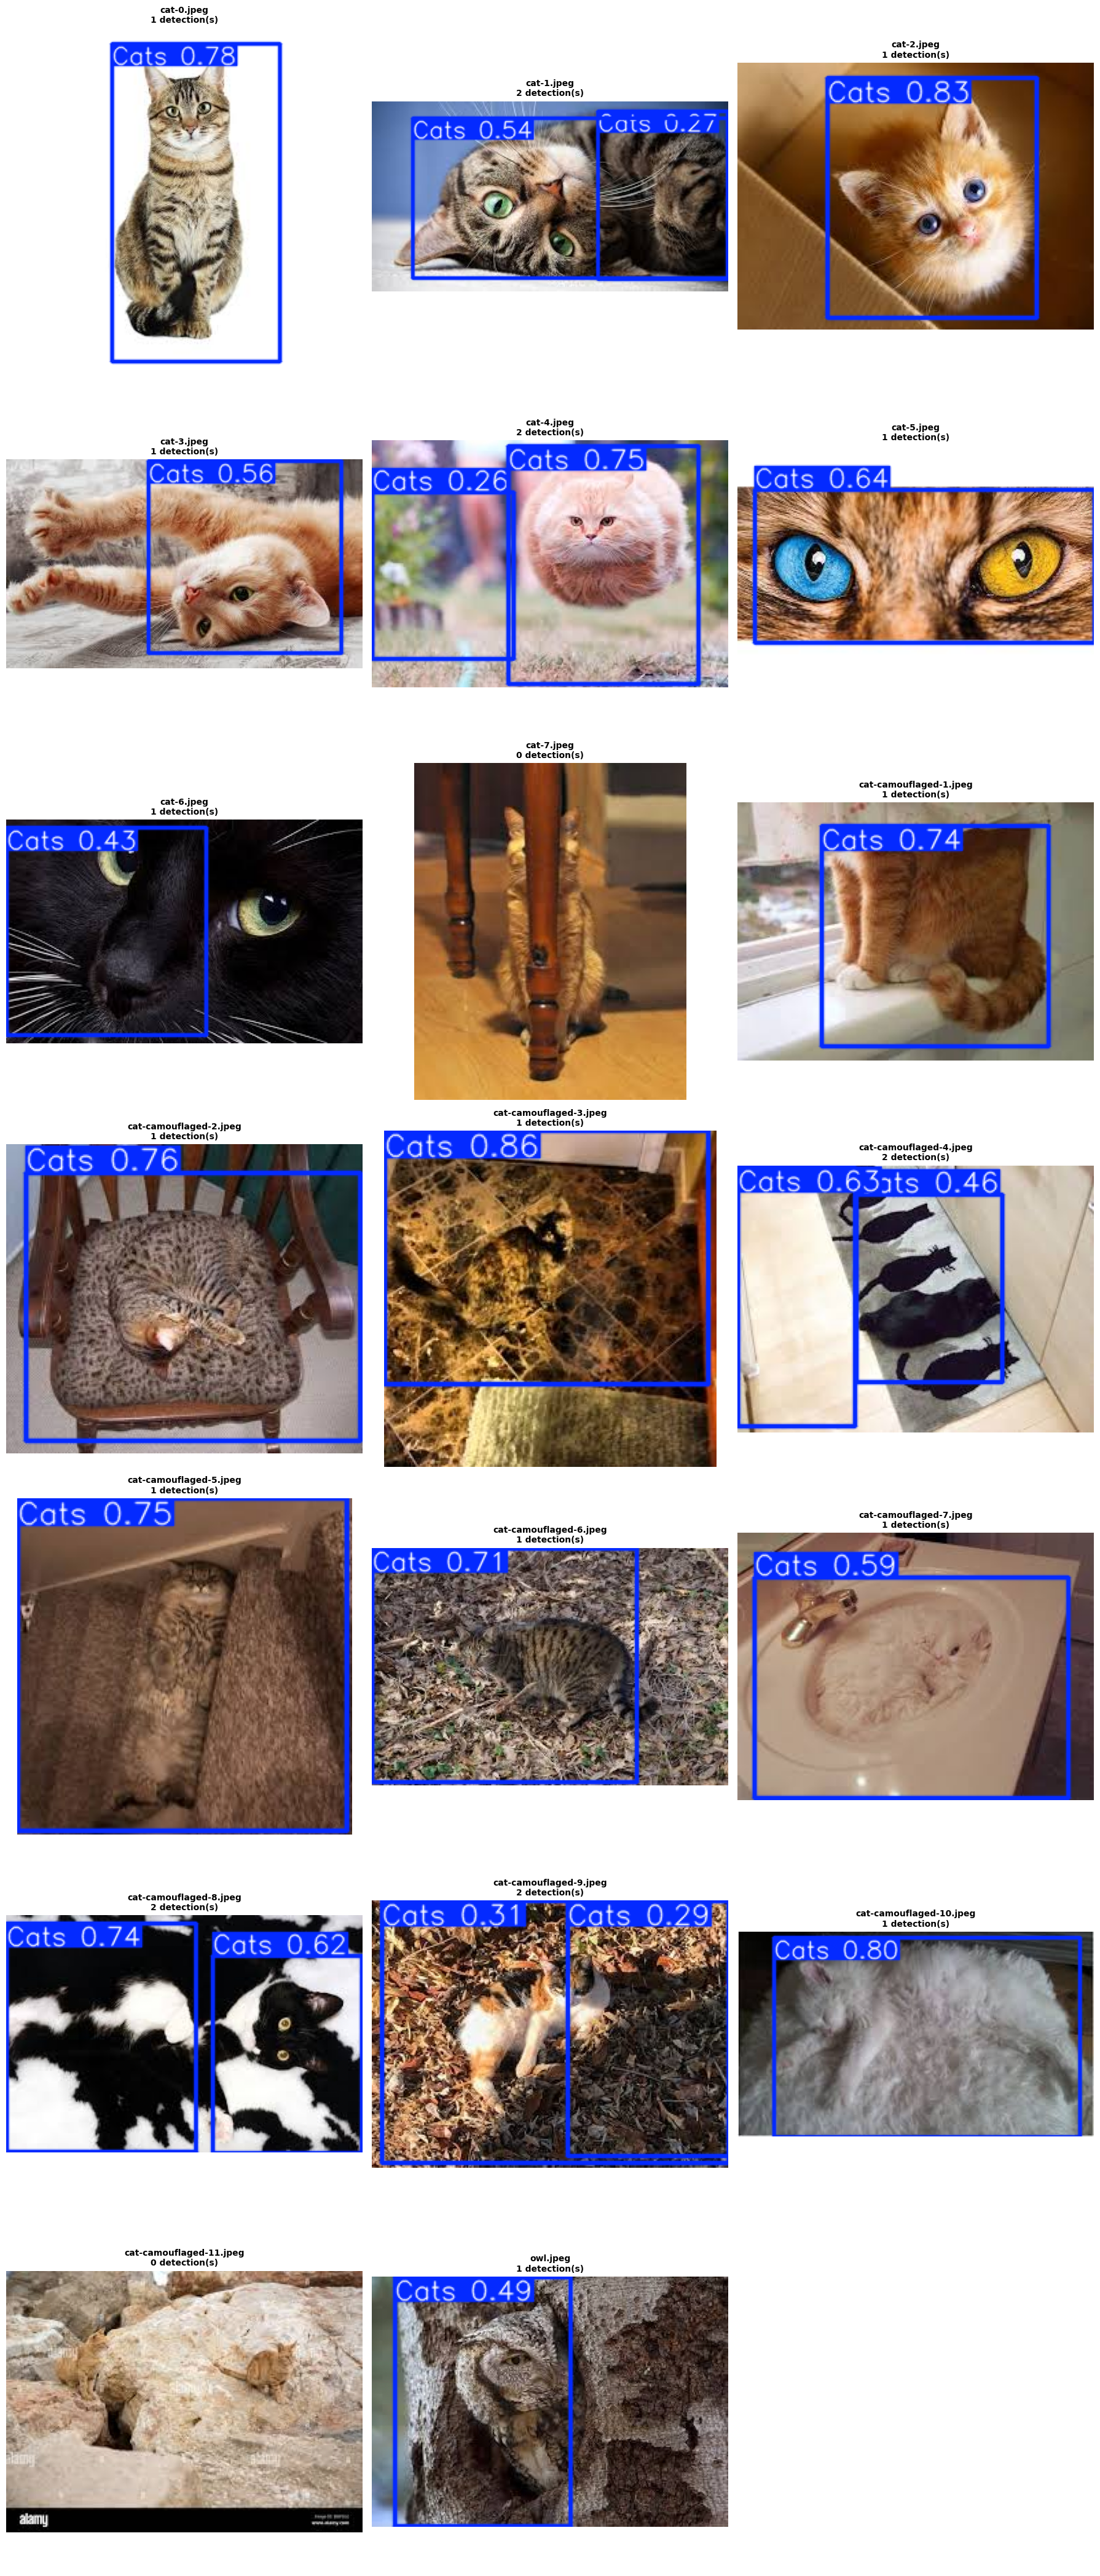


✓ All results saved to: batch_results/
✓ Summary saved as: batch_detection_results.png


In [ ]:
print("\n" + "="*70)
print("STARTING INFERENCE MODE")
print("="*70 + "\n")

# ========================================================================
# 1. LOAD TRAINED MODEL
# ========================================================================

print("="*70)
print("MODEL LOADING")
print("="*70 + "\n")

# Try to load the model
try:
    model = YOLO(TRAINED_MODEL_PATH)
    print(f"✓ Model loaded successfully from: {TRAINED_MODEL_PATH}")
except FileNotFoundError:
    print(f"❌ Model not found at: {TRAINED_MODEL_PATH}")
    print("\nOptions:")
    print("1. Upload your trained model (.pt file)")
    print("2. Update TRAINED_MODEL_PATH variable")
    print("3. Train a model first by setting MODE='train'")

    # Try to upload model
    print("\nAttempting to upload model...")
    from google.colab import files
    uploaded = files.upload()
    if uploaded:
        TRAINED_MODEL_PATH = list(uploaded.keys())[0]
        model = YOLO(TRAINED_MODEL_PATH)
        print(f"✓ Model loaded from upload: {TRAINED_MODEL_PATH}")
    else:
        raise FileNotFoundError("No model available")

# Display model info
print(f"\nModel Info:")
print(f"  • Task: {model.task}")
print(f"  • Classes: {len(model.names)}")
print(f"  • Class names: {model.names}")
print(f"  • Device: {device}")

# ========================================================================
# 2. INFERENCE FUNCTIONS
# ========================================================================

def test_single_image(conf_threshold=CONF_THRESHOLD, iou_threshold=IOU_THRESHOLD):
    """Upload and test a single image"""
    print("\n" + "="*70)
    print("SINGLE IMAGE TESTING")
    print("="*70 + "\n")

    from google.colab import files
    print("Please upload an image to test:")
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded")
        return

    image_path = list(uploaded.keys())[0]
    print(f"✓ Image uploaded: {image_path}")

    # Run prediction
    results = model.predict(
        source=image_path,
        conf=conf_threshold,
        iou=iou_threshold,
        save=False,
        verbose=False
    )

    result = results[0]

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Original
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
    axes[0].axis('off')

    # With detections
    result_img = result.plot()
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    axes[1].imshow(result_img)
    axes[1].set_title(f'Detections (conf ≥ {conf_threshold})', fontsize=14, fontweight='bold')
    axes[1].axis('off')

    plt.tight_layout()
    plt.savefig('detection_result.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print results
    print("\n" + "="*70)
    print("DETECTION RESULTS")
    print("="*70)

    boxes = result.boxes
    if len(boxes) == 0:
        print("❌ No objects detected")
        print(f"   Try lowering confidence threshold (current: {conf_threshold})")
    else:
        print(f"✓ Detected {len(boxes)} object(s):\n")

        for i, box in enumerate(boxes):
            cls_id = int(box.cls[0])
            class_name = model.names[cls_id]
            confidence = float(box.conf[0])
            bbox = box.xyxy[0].cpu().numpy()

            print(f"{i+1}. {class_name}")
            print(f"   Confidence: {confidence:.2%}")
            print(f"   Bounding Box: [{bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f}]")
            print()

    print("="*70)
    print("✓ Result saved as: detection_result.png")

    return results

def test_multiple_images(conf_threshold=CONF_THRESHOLD, iou_threshold=IOU_THRESHOLD):
    """Upload and test multiple images"""
    print("\n" + "="*70)
    print("MULTIPLE IMAGES TESTING")
    print("="*70 + "\n")

    from google.colab import files
    print("Please upload one or more images:")
    uploaded = files.upload()

    if not uploaded:
        print("No files uploaded")
        return

    image_paths = list(uploaded.keys())
    print(f"✓ Uploaded {len(image_paths)} image(s)")

    # Create results directory
    results_dir = 'batch_results'
    os.makedirs(results_dir, exist_ok=True)

    # Process each image
    all_results = []

    for idx, image_path in enumerate(image_paths):
        print(f"\nProcessing {idx+1}/{len(image_paths)}: {image_path}")

        results = model.predict(
            source=image_path,
            conf=conf_threshold,
            iou=iou_threshold,
            save=False,
            verbose=False
        )

        result = results[0]
        all_results.append(result)

        num_detections = len(result.boxes)
        print(f"  → Detected {num_detections} object(s)")

        # Save result
        result_img = result.plot()
        output_path = os.path.join(results_dir, f'result_{idx+1}_{image_path}')
        cv2.imwrite(output_path, result_img)

    # Visualize all
    cols = min(3, len(image_paths))
    rows = (len(image_paths) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
    if len(image_paths) == 1:
        axes = [axes]
    else:
        axes = axes.ravel() if len(image_paths) > 1 else [axes]

    for idx, (result, image_path) in enumerate(zip(all_results, image_paths)):
        result_img = result.plot()
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        axes[idx].imshow(result_img)
        axes[idx].set_title(f'{image_path}\n{len(result.boxes)} detection(s)',
                           fontsize=10, fontweight='bold')
        axes[idx].axis('off')

    for idx in range(len(image_paths), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('batch_detection_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "="*70)
    print(f"✓ All results saved to: {results_dir}/")
    print(f"✓ Summary saved as: batch_detection_results.png")
    print("="*70)

    return all_results

def test_from_url(image_url, conf_threshold=CONF_THRESHOLD, iou_threshold=IOU_THRESHOLD):
    """Test an image from URL"""
    print("\n" + "="*70)
    print("URL IMAGE TESTING")
    print("="*70 + "\n")

    print(f"Testing image from: {image_url}")

    results = model.predict(
        source=image_url,
        conf=conf_threshold,
        iou=iou_threshold,
        save=False,
        verbose=False
    )

    result = results[0]

    # Visualize
    result_img = result.plot()
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(result_img)
    plt.title(f'Detections from URL (conf ≥ {conf_threshold})', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('url_detection_result.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print results
    boxes = result.boxes
    print(f"\n✓ Detected {len(boxes)} object(s)")

    for i, box in enumerate(boxes):
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]
        confidence = float(box.conf[0])
        print(f"{i+1}. {class_name}: {confidence:.2%}")

    return results

# ========================================================================
# 3. INFERENCE MENU
# ========================================================================

print("\n" + "="*70)
print("READY TO TEST!")
print("="*70)

print("\n📸 Available Testing Functions:")
print("="*70)
print("\n1️⃣  Test single image:")
print("     results = test_single_image(conf_threshold=0.25)")

print("\n2️⃣  Test multiple images:")
print("     results = test_multiple_images(conf_threshold=0.25)")

print("\n3️⃣  Test from URL:")
print("     url = 'https://ultralytics.com/images/bus.jpg'")
print("     results = test_from_url(url, conf_threshold=0.25)")

print("\n💡 Tips:")
print("="*70)
print("• Lower conf_threshold (e.g., 0.1) to detect more objects")
print("• Higher conf_threshold (e.g., 0.5) for confident detections only")
print("• Run functions multiple times to test different images")

print("\n" + "="*70)
print("Execute one of the functions above to start testing!")
print("="*70 + "\n")

# Uncomment one of these to test immediately:
# results = test_single_image()
results = test_multiple_images()
# results = test_from_url('https://ultralytics.com/images/bus.jpg')